# Frequency graphs

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

In [2]:
# load audio
path = "./audio-files/dragonball.wav"
y, sr = librosa.load(path)
print('File ' + path.split('/')[len(path.split('/'))-1] + ' loaded.')

File dragonball.wav loaded.


(array([8.15316579e-05, 5.29224776e-05, 7.80771470e-06, ...,
        4.51637962e-08, 4.75788653e-08, 1.00283336e-08]),
 array([0.00000000e+00, 7.66308824e-02, 1.53261765e-01, ...,
        1.10248084e+04, 1.10248851e+04, 1.10249617e+04]),
 <matplotlib.lines.Line2D at 0x21a66dd1a90>)

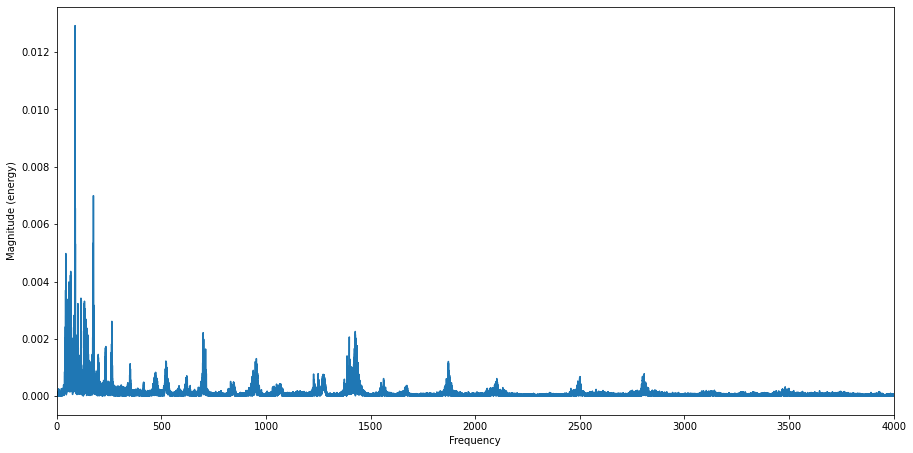

In [3]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax.set_xlim([0,4000])
plt.magnitude_spectrum(y, sr)
#ax.axis('off')

[Text(0.5, 1.0, 'Chromagram')]

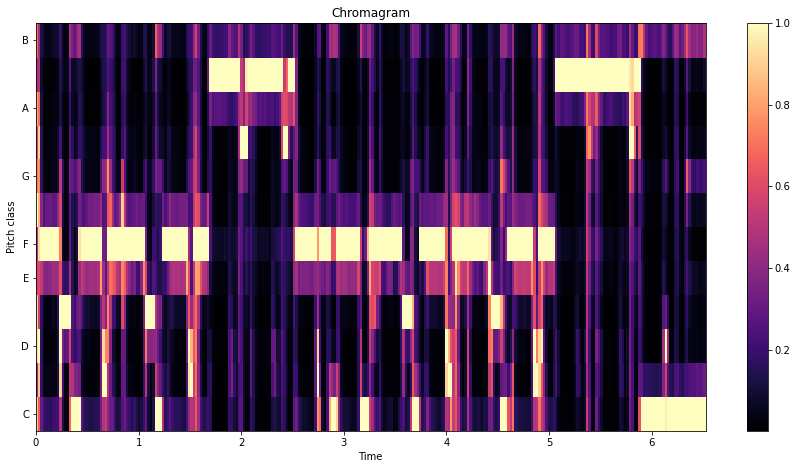

In [4]:
#Chromagram

S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots(figsize=(15,7.5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

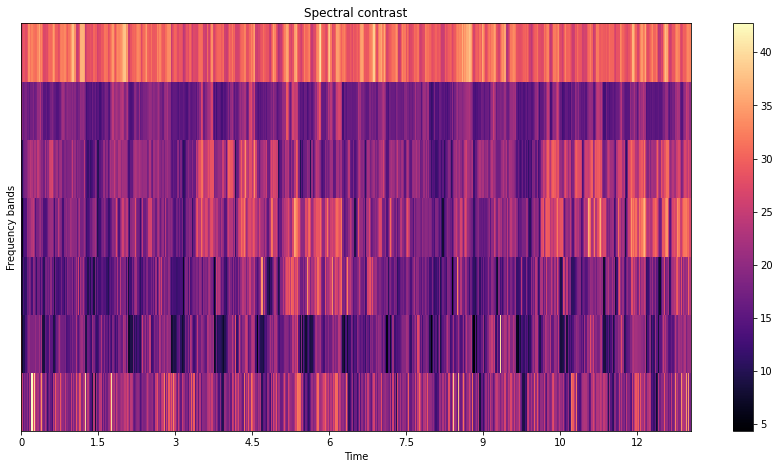

In [9]:
# Spectral Contrast

S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(figsize=(15,7.5))
img2 = librosa.display.specshow(contrast, x_axis='time')
fig.colorbar(img2)
ax.set(ylabel='Frequency bands', title='Spectral contrast')

C:\Users\Max\AppData\Roaming\Python\Python38\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Max\AppData\Roaming\Python\Python38\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\Max\AppData\Roaming\Python\Python38\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0.5, 1.0, 'log Power spectrogram')]

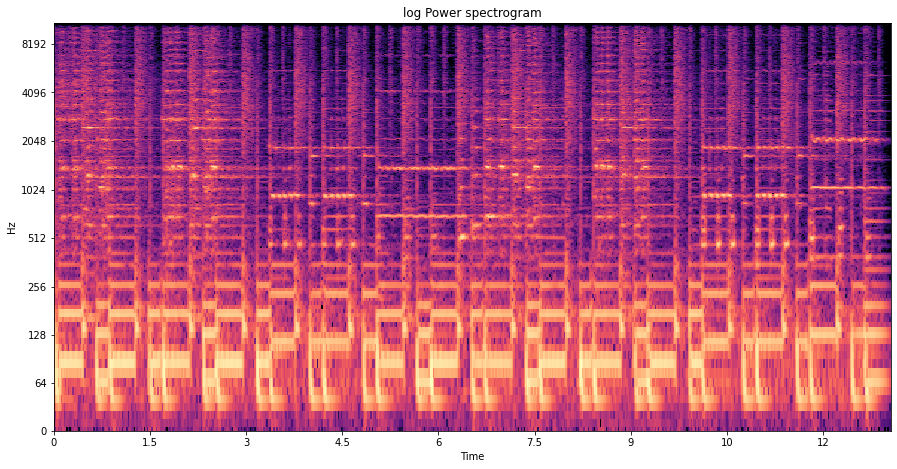

In [21]:
# Spectral bandwidth

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

fig, ax = plt.subplots(figsize=(15,7.5))
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set(title='log Power spectrogram')
#ax.fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0], alpha=0.5, label='Centroid +- bandwidth')
#ax.plot(times, centroid[0], label='Spectral centroid', color='w')
#ax.legend(loc='lower right')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

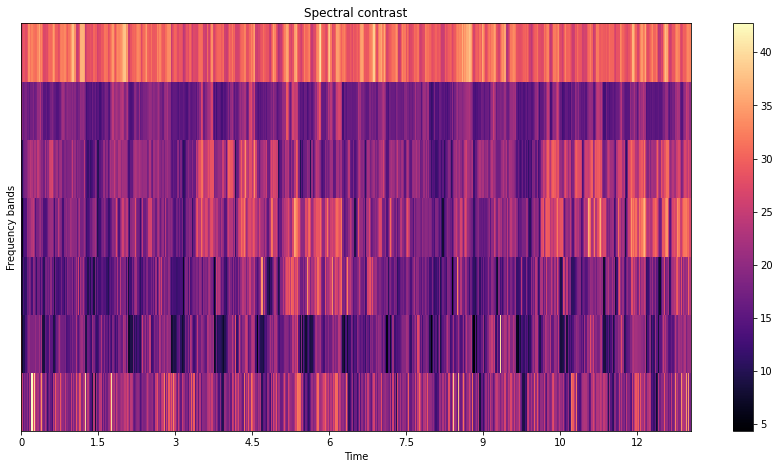

In [24]:
# Spectral Contrast

contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(figsize=(15,7.5))
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax)
fig.colorbar(img2, ax=[ax])
ax.set(ylabel='Frequency bands', title='Spectral contrast')